In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


[]

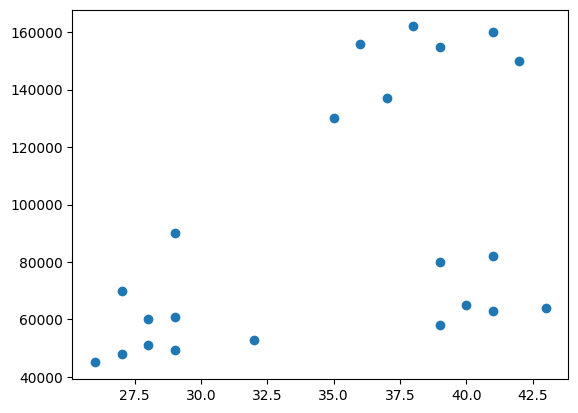

In [27]:
plt.scatter(df['Age'],df['Income($)'])
plt.plot()

In [28]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [29]:
y_predicted=km.fit_predict(df.drop(['Name'],axis='columns'))
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [30]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


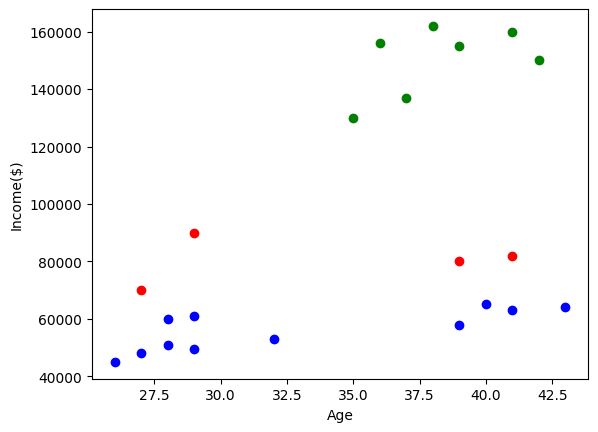

In [31]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [32]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income_scaled']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age_scaled']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster,Income_scaled,Age_scaled
0,Rob,27,70000,0,0.213675,0.058824
1,Michael,29,90000,0,0.384615,0.176471
2,Mohan,29,61000,2,0.136752,0.176471
3,Ismail,28,60000,2,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176


In [33]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [34]:
y_predicted=km.fit_predict(df.drop(['Name','Age','Income($)','cluster'],axis='columns'))
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [35]:
df['cluster_new']=y_predicted
df.head()

,Name,Age,Income($),cluster,Income_scaled,Age_scaled,cluster_new
0,Rob,27,70000,0,0.213675,0.058824,0
1,Michael,29,90000,0,0.384615,0.176471,0
2,Mohan,29,61000,2,0.136752,0.176471,0
3,Ismail,28,60000,2,0.128205,0.117647,0
4,Kory,42,150000,1,0.897436,0.941176,2


In [38]:
km.cluster_centers_

array([[0.11633428, 0.1372549 ],
       [0.2022792 , 0.85294118],
       [0.8974359 , 0.72268908]])

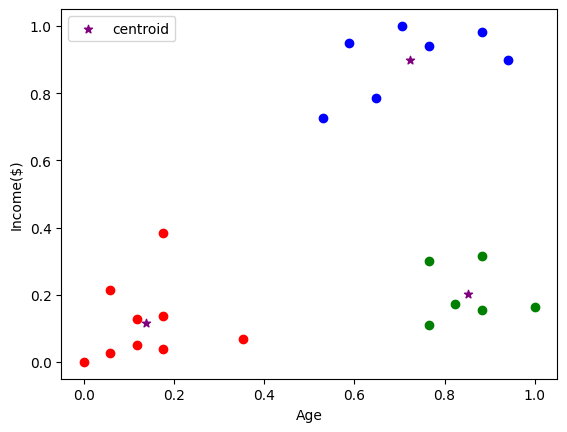

In [43]:
df0n=df[df.cluster_new==0]
df1n=df[df.cluster_new==1]
df2n=df[df.cluster_new==2]

plt.scatter(df0n['Age_scaled'],df0n['Income_scaled'],color='red')
plt.scatter(df1n['Age_scaled'],df1n['Income_scaled'],color='green')
plt.scatter(df2n['Age_scaled'],df2n['Income_scaled'],color='blue')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,0],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [44]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df.drop(['Name','Age','Income($)','cluster'],axis='columns'))
    sse.append(km.inertia_)

In [45]:
sse

[21.252193330169995,
 5.945614491472594,
 0.4750783498553096,
 0.40284770257339997,
 0.2664030124668415,
 0.22020960864009395,
 0.19852612571759057,
 0.1424758252254333,
 0.10497488680620909]

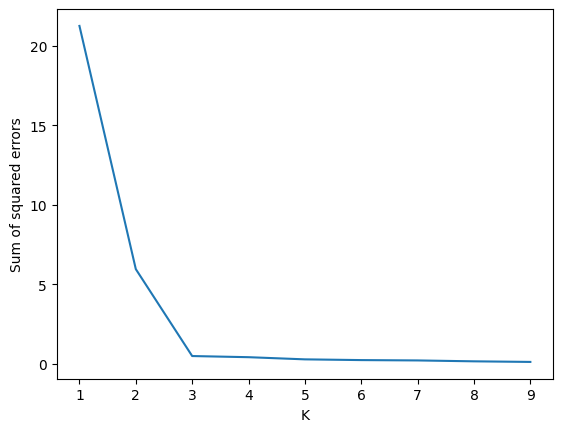

In [47]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(range(1,10),sse)
plt.show()